In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ewill/Udemy - Data Analytics-Sciece/DATA/Telco-Customer-Churn.csv")

### X -> Train data    y-> Test the data

In [3]:
X = df.drop(["Churn", "customerID"], axis=1)

In [4]:
X = pd.get_dummies(X, drop_first=True)

In [5]:
y = df["Churn"]

### Scaling

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [55]:
scaler = StandardScaler()

In [68]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [72]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [75]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

In [76]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [77]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [79]:
y_pred = grid_model.predict(scaled_X_test)

In [80]:
grid_model.best_params_

{'C': 59.94842503189409, 'penalty': 'l2'}

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1734
         Yes       0.64      0.56      0.59       587

    accuracy                           0.81      2321
   macro avg       0.75      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



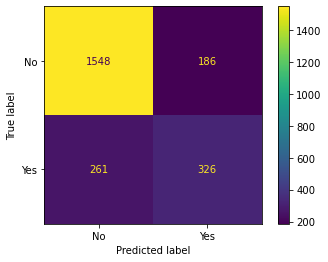

In [82]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt = DecisionTreeClassifier(max_depth=6)

In [13]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [14]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [15]:
preds = dt.predict(X_test)

In [16]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1734
         Yes       0.58      0.52      0.55       587

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.78      0.78      0.78      2321



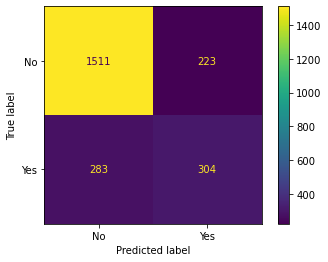

In [20]:
plot_confusion_matrix(dt, X_test,y_test)

In [24]:
imp_feats = pd.DataFrame(dt.feature_importances_, index=X.columns, columns=["Feat Imp"])

In [26]:
imp_feats = imp_feats.sort_values("Feat Imp")

In [27]:
imp_feats = imp_feats[imp_feats["Feat Imp"]>0]

<AxesSubplot:>

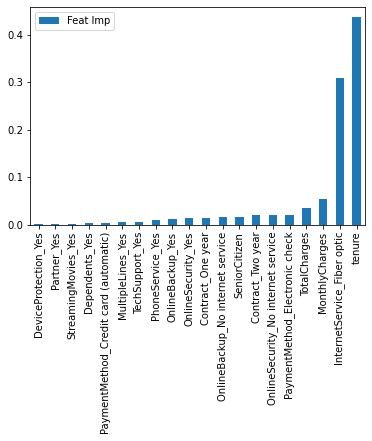

In [28]:
imp_feats.plot(kind="bar")

### Random Forest 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier(max_depth=6)

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1734
         Yes       0.58      0.52      0.55       587

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.78      0.78      0.78      2321



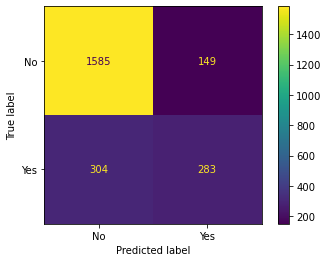

In [37]:
plot_confusion_matrix(rf, X_test,y_test)

### Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [40]:
ada_model = AdaBoostClassifier()

In [41]:
gb_model = GradientBoostingClassifier()

In [42]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [45]:
ada_preds = ada_model.predict(X_test)

In [46]:
gb_preds = gb_model.predict(X_test)

In [48]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87      1734
         Yes       0.62      0.57      0.59       587

    accuracy                           0.80      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.80      0.80      0.80      2321



In [49]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1734
         Yes       0.64      0.54      0.58       587

    accuracy                           0.81      2321
   macro avg       0.74      0.72      0.73      2321
weighted avg       0.80      0.81      0.80      2321



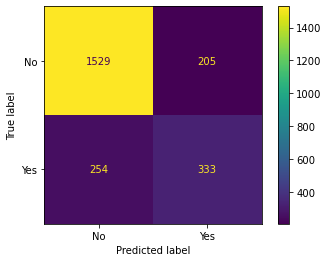

In [51]:
plot_confusion_matrix(ada_model, X_test, y_test)

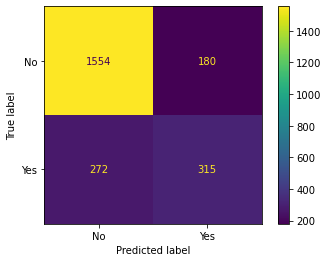

In [52]:
plot_confusion_matrix(gb_model, X_test, y_test)